# ML Project Modeling
This file shows and describes the orginal data set modeling process.

In [2]:
import pandas as pd
import numpy as np
import os
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dir_path = os.getcwd()
data_path = osp.abspath(osp.join(dir_path,"Data/"))
df_path = osp.join(data_path,'preprocessed_data.csv')
census_path = osp.join(data_path,'census_2010.csv')


## Census Data Frame

In [27]:
# reading Census frame
census_df = pd.read_csv(census_path)
print(list(census_df.columns))
census_df.head()

['Area Name-Legal/Statistical Area Description', 'Qualifying Name', 'Area (Land)', 'Area (Water)', 'Summary Level', 'Geographic Component', 'Region', 'Division', 'FIPS', 'State (FIPS)', 'County', 'Census Tract', 'Block', 'Total Population', 'Total Population.1', 'Total Population: Male', 'Total Population: Male: Under 5 years', 'Total Population: Male: 5 to 9 years', 'Total Population: Male: 10 to 14 years', 'Total Population: Male: 15 to 17 years', 'Total Population: Male: 18 to 24 years', 'Total Population: Male: 25 to 34 years', 'Total Population: Male: 35 to 44 years', 'Total Population: Male: 45 to 54 years', 'Total Population: Male: 55 to 64 years', 'Total Population: Male: 65 and 74 years', 'Total Population: Male: 75 to 84 years', 'Total Population: Male: 85 years and over', 'Total Population: Female', 'Total Population: Female: Under 5 years', 'Total Population: Female: 5 to 9 years', 'Total Population: Female: 10 to 14 years', 'Total Population: Female: 15 to 17 years', 'Tota

,Area Name-Legal/Statistical Area Description,Qualifying Name,Area (Land),Area (Water),Summary Level,Geographic Component,Region,Division,FIPS,State (FIPS),...,Total population: Two or More Races,Households,Households: Family households,Households: Family households: Married-couple family,Households: Family households: Other family,"Households: Family households: Other family: Male householder, no wife present","Households: Family households: Other family: Female householder, no husband present",Households: Nonfamily households,Households: Nonfamily households: Householder living alone,Households: Nonfamily households: Householder not living alone
0,Block 1000,"Block 1000, Block Group 1, Census Tract 402.02...",14407,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0
1,Block 1001,"Block 1001, Block Group 1, Census Tract 402.02...",8728,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0
2,Block 1002,"Block 1002, Block Group 1, Census Tract 402.02...",8711,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0
3,Block 1003,"Block 1003, Block Group 1, Census Tract 402.02...",8908,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0
4,Block 1004,"Block 1004, Block Group 1, Census Tract 402.02...",17117,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0


## MARTA Data
This data was created using our data set and the preprocess data file. Referrer to there for any indications of what columns are created from what data.

In [23]:
data_df = pd.read_csv(df_path)
data_df.UID = data_df.UID.str.replace("(",'')
data_df.UID = data_df.UID.str.replace(")",'')
data_df.UID = data_df.UID.str.split(',')
#data_df.UID = data_df.UID.apply(lambda x: [int(i) for i in x])
# extracting county
data_df.insert(len(data_df.columns),'COUNTY',data_df.UID.apply(lambda x: x[0]))
# extracting census tract
data_df.insert(len(data_df.columns),'TRACT',data_df.UID.apply(lambda x: x[1]))
# extracting Block
data_df.insert(len(data_df.columns),'BLOCK',data_df.UID.apply(lambda x: x[2]))
data_df.COUNTY = data_df.COUNTY.str.replace("'",'')
data_df.TRACT = data_df.TRACT.str.replace("'",'')
data_df.BLOCK = data_df.BLOCK.str.replace("'",'')
# changing datatypes
data_df.COUNTY = data_df.COUNTY.astype('int32')
data_df.TRACT = data_df.TRACT.astype('int32')
data_df.BLOCK = data_df.BLOCK.astype('int32')
data_df = data_df.drop(['UID'],axis=1)
data_df.head()

,stop_id,TRIPS,COUNTY,TRACT,BLOCK
0,1,2,63,40202,1038
1,1,2,63,40202,1087
2,1,2,63,40202,2011
3,1,1,63,40203,2001
4,1,1,63,40204,1001


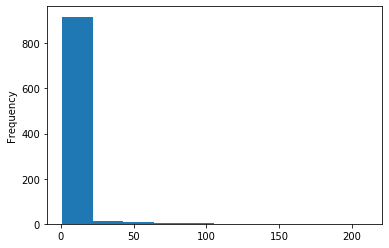

In [24]:
data_df.TRIPS.plot.hist()

In [25]:
data_df.TRIPS.sum()

3773

In [26]:
data_df.stop_id.sum()

1095

## Merging The Datasets

In [30]:
din = data_df.merge(census_df, left_on=['COUNTY','TRACT','BLOCK'], right_on=['County','Census Tract','Block'])
drop_cols = ['Area Name-Legal/Statistical Area Description', 'Qualifying Name', 'Area (Land)', 'Area (Water)',
             'Summary Level', 'Geographic Component', 'Region',
             'Division', 'FIPS', 'State (FIPS)', 'County', 'Census Tract', 'Block']
din = din.drop(drop_cols, axis=1)
din

,stop_id,TRIPS,COUNTY,TRACT,BLOCK,Total Population,Total Population.1,Total Population: Male,Total Population: Male: Under 5 years,Total Population: Male: 5 to 9 years,...,Total population: Two or More Races,Households,Households: Family households,Households: Family households: Married-couple family,Households: Family households: Other family,"Households: Family households: Other family: Male householder, no wife present","Households: Family households: Other family: Female householder, no husband present",Households: Nonfamily households,Households: Nonfamily households: Householder living alone,Households: Nonfamily households: Householder not living alone
0,1,2,63,40202,1038,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,63,40202,1087,22,22,7,2,0,...,0,8,7,0,7,1,6,1,1,0
2,1,2,63,40202,2011,26,26,18,3,2,...,0,6,4,3,1,0,1,2,2,0
3,1,1,63,40203,2001,508,508,247,32,25,...,17,152,116,25,91,26,65,36,25,11
4,1,1,63,40204,1001,1076,1076,476,46,41,...,29,416,257,107,150,25,125,159,123,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,1,1,121,12000,2005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,1,5,121,12000,2009,53,53,26,1,1,...,0,20,11,2,9,1,8,9,5,4
943,3,148,121,12300,2067,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
944,1,3,121,12300,3001,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preparing for Machine Learning
1. We remove the County, TRACT, BLOCK Columns
2. We remove duplicate columns like Total Population.1
3. We split up the data frame into X and y
4. We scale each column to -1 to 1


## Preliminary Analysis
1. Compute correlations of each variables with the number of trips
    - Make a graph of this
2. Compute covariance matrix
    - make a heatmap of this
3. Perform a Principle Component analysis and analyze the results
    - make a graph of the final one
    - make a bar graph for potentially the one

## Model Building
1. Select Two Model Selection Procedures
    - 10 fold cross validation
    - monte carlo cross validation
2. Parameter Tuning Procedure
    - Exhaustive grid search ? 
3. Model Selection
    - Elastic Net - Choose L1, L2
    - Linear Regression - Benchmark Model (is it significant)
    - Lasso Regression - Choose - L2
    - Ridge Regression - Choose - L1
    - Random Forest Regression - figure out how to train in parallel on MAC
    - SVR - choose kernels
    - KNR - choose the number 
    

## Analysis 
1. Comment on Model Selection Results
    - Create a bar graph of all of the RMSE for each graph
2. Comment on Variable Importance from the model of choice
    - Create a bar graph of VIF if Random Forest wins
3. Comment on the effect of increasing the number of stops in a census block
    - Create a graphic on the projected increase in the number of riders
4. Determine if we need to add in duration to get more significant results
    - Create a graphic with this